In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v1.0.0/"
geo_model = gp.create_model("StratBR_BES_v1.0.0")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_strat_reduced_points_with_holder_2.csv",
    path_o=data_path + "orientations_points_reduced_points_1.csv",
)

Active grids: ['regular']


StratBR_BES_v1.0.0  2023-08-31 14:06

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes,Default series,1,#015482,1
1,base,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_89Ma": ("bes"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes,Strat_Series_89Ma,1,#015482,1
1,basement,Basement_series,1,#9f0052,2


In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "BOT",
            "MID",
        ),
        "Basement_series": ("basement",),
    },
)

In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 2
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "T",
            "M1",
            "M2",
            "M3",
            "B",
        ),
        "Basement_series": ("basement",),
    },
)

In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes", "base"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes,Strat_Series,1,#015482,1
1,base,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 4
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "BOT",
        ),
        "Basement_series": ("basement",),
    },
)

In [ ]:
geo_model.set_default_orientation()

In [ ]:
rescaling = gp.core.data_modules.geometric_data.ScalingSystem(
    surface_points, orientation_points, grid
)

In [ ]:
rescaling

In [ ]:
geo_model.rescaling

In [5]:
geo_model.get_data()

X       Y      Z    smooth surface           G_x  \
surface_points 0          0       0  -3336  0.000002     bes           NaN   
               1          0    1000  -3302  0.000002     bes           NaN   
               2          0    2000  -3239  0.000002     bes           NaN   
               3          0    3000  -3182  0.000002     bes           NaN   
               4          0    4000  -3161  0.000002     bes           NaN   
...                     ...     ...    ...       ...     ...           ...   
               5658  179000  145000 -12930  0.000002    base           NaN   
               5659  179000  146000 -12928  0.000002    base           NaN   
               5660  179000  147000 -12926  0.000002    base           NaN   
               5661  179000  148000 -12921  0.000002    base           NaN   
orientations   0          0       0  -3336  0.010000     bes  1.000000e-12   

                              G_y  G_z  
surface_points 0              NaN  NaN  
               1              NaN  NaN  
               2              NaN  NaN  
               3              NaN  NaN  
               4              NaN  NaN  
...                           ...  ...  
               5658           NaN  NaN  
               5659           NaN  NaN  
               5660           NaN  NaN  
               5661           NaN  NaN  
orientations   0     1.000000e-12  1.0  

[5663 rows x 8 columns]

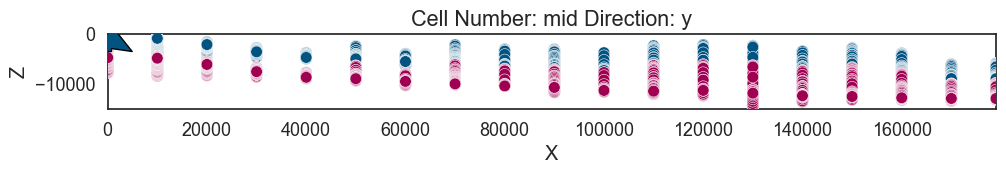

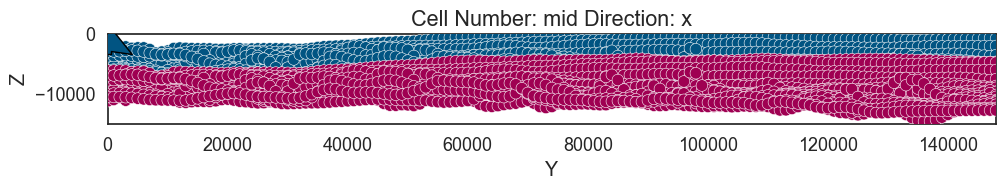

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [ ]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

In [ ]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=3)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)